Enunciado:

Queremos predecir la presión arterial sistólica de los pacientes utilizando regresión lineal y determinar si un paciente tiene diabetes utilizando regresión logística. Para esto, contamos con un dataset que incluye las siguientes variables:

* Edad
* IMC (Índice de Masa Corporal)
* Colesterol
* Glucosa
* Presión Arterial Sistólica (variable objetivo para la regresión lineal)
* Diabetes (variable objetivo para la regresión logística)






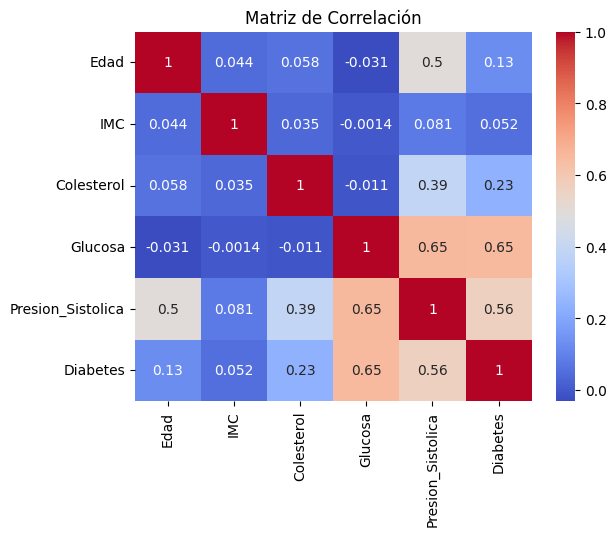

In [ ]:
import pandas as pd #Libretia para procesamiento de DataFrames
import numpy as np #Libreria de procesamiento numerico para arreglos y matrices.
import seaborn as sns #Libreria para manejo de visualizacion.
import matplotlib.pyplot as plt #libreria basica para graficos y visualizaciones.
from sklearn.model_selection import train_test_split # importa la funcion para clasificar el DataSet entre test y entrenamiento
from sklearn.linear_model import SGDRegressor, SGDClassifier # SGDRegressor gradiente descendente para variables numericas, SGDClassifier gradiente descendente para categorizar [1,0]
from sklearn.preprocessing import StandardScaler #Libreria para estandarizar y escalar el conjunto de datos.
from sklearn.pipeline import Pipeline # Esta es una herramienta para para encadenar pasos de procesamiento
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix #Metricas de evaluacion para el modelo.

# Generar datos ficticios
np.random.seed(42) #Fija una semilla para que los datos generados de manera aleatoria se mantengan en cada ejecucion.
n_samples = 1000 #Definimos la cantidad de muestras generadas
edad = np.random.randint(0, 80, size=n_samples) # Un array donde se generan 1000 numeros aleatorios entre 0 y 80 (utiliza numeros enteros)
imc = np.random.uniform(18, 35, size=n_samples) # Un array donde se generan 1000 numeros aleatorios entre 18 y 35 (Utiliza numeros flotantes)
colesterol = np.random.uniform(150, 250, size=n_samples) # Un array donde se generan 1000 numeros aleatorios entre 150 y 250 (utiliza numeros enteros)
glucosa = np.random.uniform(70, 180, size=n_samples) # Un array donde se generan 1000 numeros aleatorios entre 70 y 180 (Utiliza numeros flotantes)
presion_sistolica = 120 + 0.5 * edad + 0.2 * imc + 0.3 * colesterol + 0.5 * glucosa + np.random.randn(n_samples) * 10 #Formula que retorna el valor para la presion_sistolica
diabetes = (0.03 * edad + 0.05 * imc + 0.04 * colesterol + 0.1 * glucosa + np.random.randn(n_samples) > 20).astype(int)

# Crear  un DataFrame con 6 columnas mediante un diccionario para un total de 6 columnas que describen los datos que generamos de forma aleatoria
data = pd.DataFrame({
    'Edad': edad,
    'IMC': imc,
    'Colesterol': colesterol,
    'Glucosa': glucosa,
    'Presion_Sistolica': presion_sistolica,
    'Diabetes': diabetes
})

# Análisis de correlación
corr_matrix = data.corr() # metodo para generar la matriz de coorelacion
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm') # sns.heatmap nos ayuda a graficar las parcelas visuales para la matriz
plt.title('Matriz de Correlación') #genera el titulo para el grafico
plt.show() #Genera el objeto que se va a mostrar.

# Eliminar variables altamente correlacionadas (suponiendo que eliminamos 'Colesterol' debido a alta correlación)
# Aquí, decidimos eliminar 'Colesterol' debido a su alta correlación con otras variables
# Esta decisión se toma para evitar problemas de multicolinealidad
data = data.drop(columns=['Colesterol']) #Metodo para eliminar la columna completa del Dataframe.



X_lin es un DataFrame que contiene las variables independientes (predictoras) que vamos a usar para predecir la presión arterial sistólica (Presion_Sistolica). Aquí, seleccionamos Edad, IMC, y Glucosa.
y_lin es una Serie que contiene la variable dependiente (objetivo) que queremos predecir, que en este caso es la presión arterial sistólica (Presion_Sistolica).

In [ ]:
# División de los datos para regresión lineal
X_lin = data[['Edad', 'IMC', 'Glucosa']] #seleccionamos las variables  independientes del DataFrame y las traemos como listas
y_lin = data['Presion_Sistolica'] # Seleccionamos la variable dependendiente sobre la que se va a hacer la prediccion.
#Dividimos el dataset en 20% para el test y 80% para el entrenamiento
X_train_lin, X_test_lin, y_train_lin, y_test_lin = train_test_split(X_lin, y_lin, test_size=0.2, random_state=42)


#max_iter=1000: Número máximo de iteraciones que el algoritmo realizará.
#tol=1e-3: Tolerancia para la convergencia. Si la mejora del error es menor que este valor, el algoritmo dejará de iterar.
#learning_rate='optimal': Utiliza una tasa de aprendizaje óptima ajustada durante el entrenamiento.
# Entrenar el modelo de regresión lineal con SGDRegressor
pipeline_lin = Pipeline([
    ('scaler', StandardScaler()), # Estandarizar la variable que entra
    ('sgd', SGDRegressor(max_iter=1000, tol=1e-3, learning_rate='optimal')) # genera la regresion lineal a traves del gradiente descendiente
])
pipeline_lin.fit(X_train_lin, y_train_lin)  #Generacion del entrenamiento para X y para y
y_pred_lin = pipeline_lin.predict(X_test_lin) #Generacion de la prediccion.

# Evaluar el modelo de regresión lineal
mse_lin = mean_squared_error(y_test_lin, y_pred_lin) #Calculamos el error cuadratico medio entre los valores reales y la prediccion.
r2_lin = r2_score(y_test_lin, y_pred_lin) # Determinamos el coeficionete de determinacion para evaluar el porcentaje de las variables independientes que describen las varianza de la variable dependiente
print(f'Error Cuadrático Medio (MSE): {mse_lin}') #Imprimir el valor de el error cuadratico medio
print(f'Coeficiente de Determinación (R^2): {r2_lin}') #Imprimir el valor del coeficiente de determinacion.

# División de los datos para regresión logística
X_log = data[['Edad', 'IMC', 'Glucosa']] #seleccionamos las variables  independientes del DataFrame y las traemos como listas
y_log = data['Diabetes'] # Seleccionamos la variable dependendiente sobre la que se va a hacer la prediccion.
#Definimos las variables de entrenamiento y testeo y dividimos el dataset en 20% para el testeo y 80 para el entrenamiento.
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_log, y_log, test_size=0.2, random_state=42)

# Entrenar el modelo de regresión logística con SGDClassifier
pipeline_log = Pipeline([
    ('scaler', StandardScaler()), # Estandarizar la variable que entra para definir si esta entre 0 y 1
    ('sgd', SGDClassifier(loss='log_loss', max_iter=1000, tol=1e-3))
])
pipeline_log.fit(X_train_log, y_train_log)
y_pred_log = pipeline_log.predict(X_test_log)

# Evaluar el modelo de regresión logística
accuracy_log = accuracy_score(y_test_log, y_pred_log)
precision_log = precision_score(y_test_log, y_pred_log)

conf_matrix_log = confusion_matrix(y_test_log, y_pred_log)

print(f'Exactitud (Accuracy): {accuracy_log}')
print(f'Precisión (Precision): {precision_log}')


Error Cuadrático Medio (MSE): 207.21307148262608
Coeficiente de Determinación (R^2): 0.7007771069729621
Exactitud (Accuracy): 0.875
Precisión (Precision): 0.9172932330827067


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import SGDRegressor, SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Generar más datos ficticios
np.random.seed(42)
n_samples = 5000
edad = np.random.randint(0, 80, size=n_samples)
imc = np.random.uniform(18, 35, size=n_samples)
glucosa = np.random.uniform(70, 180, size=n_samples)
presion_sistolica = 120 + 0.5 * edad + 0.2 * imc + 0.5 * glucosa + np.random.randn(n_samples) * 10
diabetes = (0.03 * edad + 0.05 * imc + 0.1 * glucosa + np.random.randn(n_samples) > 20).astype(int)

# Crear DataFrame
data = pd.DataFrame({
    'Edad': edad,
    'IMC': imc,
    'Glucosa': glucosa,
    'Presion_Sistolica': presion_sistolica,
    'Diabetes': diabetes
})



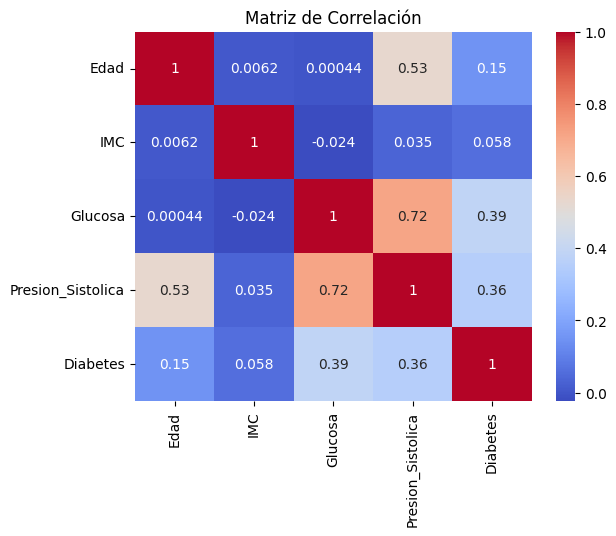

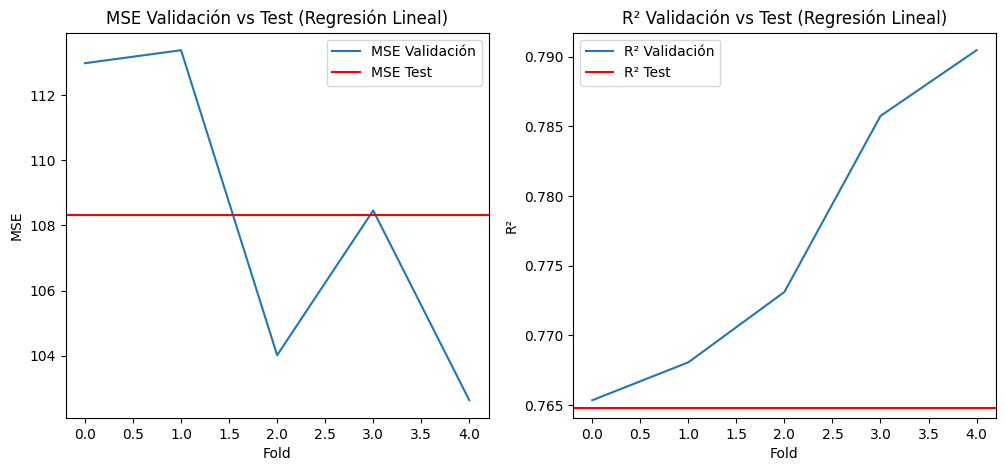

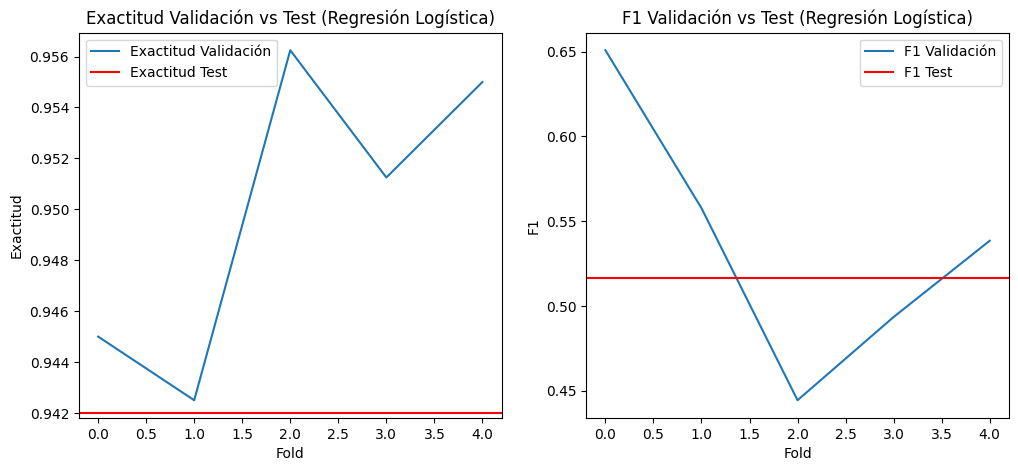

In [ ]:
# Análisis de correlación
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

# División de los datos para regresión lineal
X_lin = data[['Edad', 'IMC', 'Glucosa']]
y_lin = data['Presion_Sistolica']
X_train_lin, X_test_lin, y_train_lin, y_test_lin = train_test_split(X_lin, y_lin, test_size=0.2, random_state=42)

# Entrenar y evaluar el modelo de regresión lineal con validación cruzada
kf = KFold(n_splits=5, shuffle=True, random_state=42)
pipeline_lin = Pipeline([
    ('scaler', StandardScaler()),
    ('sgd', SGDRegressor(max_iter=1000, tol=1e-3, learning_rate='optimal'))
])

# Guardar los resultados de validación
val_mse_scores = []
val_r2_scores = []

for train_index, val_index in kf.split(X_train_lin):
    X_train_fold, X_val_fold = X_train_lin.iloc[train_index], X_train_lin.iloc[val_index]
    y_train_fold, y_val_fold = y_train_lin.iloc[train_index], y_train_lin.iloc[val_index]

    pipeline_lin.fit(X_train_fold, y_train_fold)
    y_val_pred = pipeline_lin.predict(X_val_fold)

    val_mse_scores.append(mean_squared_error(y_val_fold, y_val_pred))
    val_r2_scores.append(r2_score(y_val_fold, y_val_pred))

# Evaluación en el conjunto de test
pipeline_lin.fit(X_train_lin, y_train_lin)
y_pred_lin = pipeline_lin.predict(X_test_lin)
mse_lin_test = mean_squared_error(y_test_lin, y_pred_lin)
r2_lin_test = r2_score(y_test_lin, y_pred_lin)

# Graficar resultados de MSE y R² en validación y test
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(val_mse_scores, label='MSE Validación')
plt.axhline(y=mse_lin_test, color='r', linestyle='-', label='MSE Test')
plt.xlabel('Fold')
plt.ylabel('MSE')
plt.legend()
plt.title('MSE Validación vs Test (Regresión Lineal)')

plt.subplot(1, 2, 2)
plt.plot(val_r2_scores, label='R² Validación')
plt.axhline(y=r2_lin_test, color='r', linestyle='-', label='R² Test')
plt.xlabel('Fold')
plt.ylabel('R²')
plt.legend()
plt.title('R² Validación vs Test (Regresión Lineal)')
plt.show()

# División de los datos para regresión logística
X_log = data[['Edad', 'IMC', 'Glucosa']]
y_log = data['Diabetes']
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_log, y_log, test_size=0.2, random_state=42)

# Entrenar y evaluar el modelo de regresión logística con validación cruzada
pipeline_log = Pipeline([
    ('scaler', StandardScaler()),
    ('sgd', SGDClassifier(loss='log_loss', max_iter=1000, tol=1e-3))
])

# Guardar los resultados de validación
val_accuracy_scores = []
val_f1_scores = []

for train_index, val_index in kf.split(X_train_log):
    X_train_fold, X_val_fold = X_train_log.iloc[train_index], X_train_log.iloc[val_index]
    y_train_fold, y_val_fold = y_train_log.iloc[train_index], y_train_log.iloc[val_index]

    pipeline_log.fit(X_train_fold, y_train_fold)
    y_val_pred = pipeline_log.predict(X_val_fold)

    val_accuracy_scores.append(accuracy_score(y_val_fold, y_val_pred))
    val_f1_scores.append(f1_score(y_val_fold, y_val_pred))

# Evaluación en el conjunto de test
pipeline_log.fit(X_train_log, y_train_log)
y_pred_log = pipeline_log.predict(X_test_log)
accuracy_log_test = accuracy_score(y_test_log, y_pred_log)
f1_log_test = f1_score(y_test_log, y_pred_log)

# Graficar resultados de Exactitud y F1 en validación y test
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(val_accuracy_scores, label='Exactitud Validación')
plt.axhline(y=accuracy_log_test, color='r', linestyle='-', label='Exactitud Test')
plt.xlabel('Fold')
plt.ylabel('Exactitud')
plt.legend()
plt.title('Exactitud Validación vs Test (Regresión Logística)')

plt.subplot(1, 2, 2)
plt.plot(val_f1_scores, label='F1 Validación')
plt.axhline(y=f1_log_test, color='r', linestyle='-', label='F1 Test')
plt.xlabel('Fold')
plt.ylabel('F1')
plt.legend()
plt.title('F1 Validación vs Test (Regresión Logística)')
plt.show()
